In [33]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
import re
import os

In [34]:
zch_stats_folders = [x for x in os.listdir("/home/lizhouyu/home/lizhouyu/zch_results") if x.startswith("result_tbsize")]
zch_stats_folders = [x for x in zch_stats_folders if "_50000_" in x and "kuairand27k" in x]
print(zch_stats_folders)
#

['result_tbsize_50000_zch_dlrmv3_kuairand27k', 'result_tbsize_50000_nonzch_dlrmv3_kuairand27k']


In [35]:
figure_folder = "/home/lizhouyu/home/lizhouyu/zch_results_figures"
os.makedirs(figure_folder, exist_ok=True)

In [36]:
def get_average_zch(zch_stats_file_folder):
    zch_stats_file_path = os.path.join(zch_stats_file_folder, 'zch_metrics.csv')
    df_zch_stats = pd.read_csv(zch_stats_file_path)
    # maintain a dictionary of {feature_name: {batch_idx: accumulated_collision_over_all_ranks_at_batch_idx}}
    feature_name_accumulated_collision_count_dict = {}
    feature_name_accumulated_total_count_dict = {}
    batch_count = 0
    for index, row in df_zch_stats.iterrows():
        feature_name = row["feature_name"]
        if feature_name != "video_id":
            continue
        batch_count += 1
        batch_idx = row["batch_idx"]
        collision_cnt = row["collision_cnt"]
        total_cnt = row["total_cnt"]
        if feature_name not in feature_name_accumulated_collision_count_dict:
            feature_name_accumulated_collision_count_dict[feature_name] = {}
        if batch_count not in feature_name_accumulated_collision_count_dict[feature_name]:
            feature_name_accumulated_collision_count_dict[feature_name][batch_count] = 0
        feature_name_accumulated_collision_count_dict[feature_name][batch_count] += int(collision_cnt)
        if feature_name not in feature_name_accumulated_total_count_dict:
            feature_name_accumulated_total_count_dict[feature_name] = {}
        if batch_count not in feature_name_accumulated_total_count_dict[feature_name]:
            feature_name_accumulated_total_count_dict[feature_name][batch_count] = 0
        feature_name_accumulated_total_count_dict[feature_name][batch_count] += int(total_cnt)
    # sort each feature_name's dict by batch_idx
    for feature_name in feature_name_accumulated_collision_count_dict:
        feature_name_accumulated_collision_count_dict[feature_name] = dict(sorted(feature_name_accumulated_collision_count_dict[feature_name].items()))
        feature_name_accumulated_total_count_dict[feature_name] = dict(sorted(feature_name_accumulated_total_count_dict[feature_name].items()))
    print(feature_name_accumulated_collision_count_dict)
    # calculate accumulated collision
    for feature_name in feature_name_accumulated_collision_count_dict:
        for batch_count in feature_name_accumulated_collision_count_dict[feature_name]:
            if batch_count == 1:
                continue
            feature_name_accumulated_collision_count_dict[feature_name][batch_count] = feature_name_accumulated_collision_count_dict[feature_name][batch_count] + feature_name_accumulated_collision_count_dict[feature_name][batch_count-1]
            feature_name_accumulated_total_count_dict[feature_name][batch_count] = feature_name_accumulated_total_count_dict[feature_name][batch_count] + feature_name_accumulated_total_count_dict[feature_name][batch_count-1]
    # get average accumulated_collision_count for each batch over all the features
    average_accumulated_collision_count_dict = {}
    for batch_idx in range(1, len(list(feature_name_accumulated_collision_count_dict.values())[0])):
        accumulated_collision_count_sum = 0
        accumulated_total_count_sum = 0
        for feature_name in feature_name_accumulated_collision_count_dict:
            accumulated_collision_count_sum += feature_name_accumulated_collision_count_dict[feature_name][batch_idx]
            accumulated_total_count_sum += feature_name_accumulated_total_count_dict[feature_name][batch_idx]
        average_accumulated_collision_count_dict[batch_idx] = accumulated_collision_count_sum / accumulated_total_count_sum
    return average_accumulated_collision_count_dict, feature_name_accumulated_total_count_dict

In [37]:
re_zch_method_name_pattern = re.compile(r"\d+_((non)?zch(_.*)?)")
re_table_size_pattern = re.compile(r"result_tbsize_(\d+)")

In [38]:
table_size_zch_method_avetage_collision_dict = {}
table_size_zch_method_total_cnt_dict = {}
for zch_stats_folder in zch_stats_folders:
    zch_method_name = re_zch_method_name_pattern.search(zch_stats_folder).group(1)
    table_size = int(re_table_size_pattern.search(zch_stats_folder).group(1))
    print(zch_method_name, table_size)
    zch_stats_file_folder = os.path.join("/home/lizhouyu/home/lizhouyu/zch_results", zch_stats_folder)
    average_collision_dict, total_cnt_dict = get_average_zch(zch_stats_file_folder)
    if table_size not in table_size_zch_method_avetage_collision_dict:
        table_size_zch_method_avetage_collision_dict[table_size] = {}
    table_size_zch_method_avetage_collision_dict[table_size][zch_method_name] = average_collision_dict
    if table_size not in table_size_zch_method_total_cnt_dict:
        table_size_zch_method_total_cnt_dict[table_size] = {}
    table_size_zch_method_total_cnt_dict[table_size][zch_method_name] = total_cnt_dict
print(table_size_zch_method_avetage_collision_dict)

zch_dlrmv3_kuairand27k 50000
{'video_id': {1: 1301, 2: 882, 3: 683, 4: 573, 5: 484, 6: 842, 7: 2359, 8: 4059, 9: 4555, 10: 4508, 11: 4596, 12: 4659, 13: 4507, 14: 4617, 15: 4550, 16: 4627, 17: 4675, 18: 4521, 19: 4427, 20: 4771, 21: 4603, 22: 4707, 23: 4705, 24: 4578, 25: 4625, 26: 4674, 27: 4661, 28: 4515, 29: 4648, 30: 4581, 31: 4733, 32: 4763, 33: 4470, 34: 4595, 35: 4555, 36: 4564, 37: 4661, 38: 4445, 39: 4556, 40: 4510, 41: 4647, 42: 4578, 43: 4597, 44: 4691, 45: 4568, 46: 4646, 47: 4716, 48: 4585, 49: 4493, 50: 4597, 51: 4561, 52: 4555, 53: 4666, 54: 4613, 55: 4790, 56: 4420, 57: 4726, 58: 4700, 59: 4527, 60: 4761, 61: 4813, 62: 4617, 63: 4642, 64: 4578, 65: 4633, 66: 4570, 67: 4702, 68: 4796, 69: 4649, 70: 4521, 71: 4863, 72: 4775, 73: 4613, 74: 4700, 75: 4722, 76: 4809, 77: 4521, 78: 4807, 79: 4524, 80: 4566, 81: 4650, 82: 4605, 83: 4650, 84: 4547, 85: 4710, 86: 4529, 87: 4684, 88: 4600, 89: 4850, 90: 4755, 91: 4644, 92: 4586, 93: 4592, 94: 4543, 95: 4729, 96: 4599, 97: 4662, 9

Plot collision rate

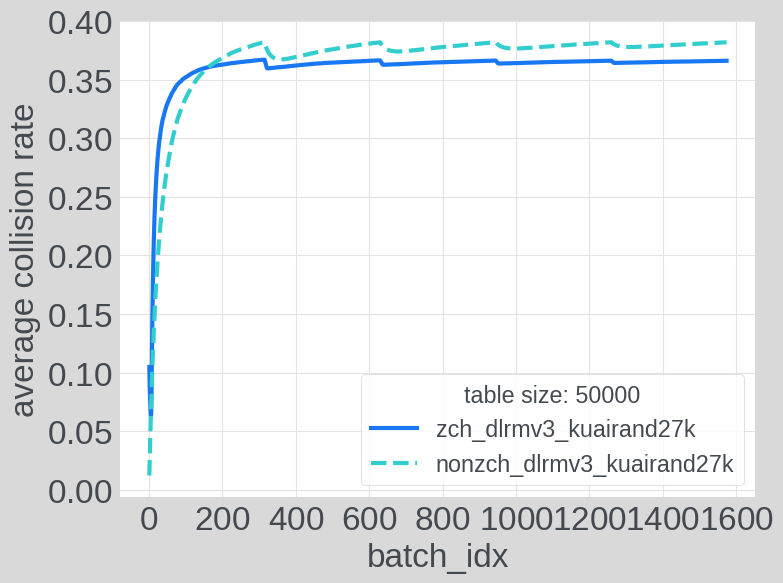

In [39]:
# plot the average ratio of accumulated_collision_count / accumulated_total_count for all the features
# the x-axis is the batch_idx, the y-axis is the ratio
for table_size in table_size_zch_method_avetage_collision_dict:
    fig = plt.figure(figsize=(8, 6))
    font_size = 24
    for zch_method_name in table_size_zch_method_avetage_collision_dict[table_size]:
        x_list = list(table_size_zch_method_avetage_collision_dict[table_size][zch_method_name].keys())
        y_list = list(table_size_zch_method_avetage_collision_dict[table_size][zch_method_name].values())
        line_style = "--" if "nonzch" in zch_method_name else "-"
        plt.plot(x_list, y_list, label=f"{zch_method_name}", linewidth=3, linestyle=line_style)
    plt.xlabel("batch_idx", fontsize=font_size)
    plt.ylabel("average collision rate", fontsize=font_size)
    # plt.title("average collision rate vs batch_idx", fontsize=font_size)
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.legend(fontsize=font_size*0.7, title=f"table size: {table_size}", title_fontsize=font_size*0.7)
    # save
    fig_path = os.path.join(figure_folder, f"average_collision_rate_vs_batch_idx_tbsize_{table_size}.png")
    plt.tight_layout()
    fig.savefig(fig_path)
    plt.show()
    plt.close()
# plot the ratio of accumulated_collision_count / accumulated_total_count

MPZCH EC
Original EC


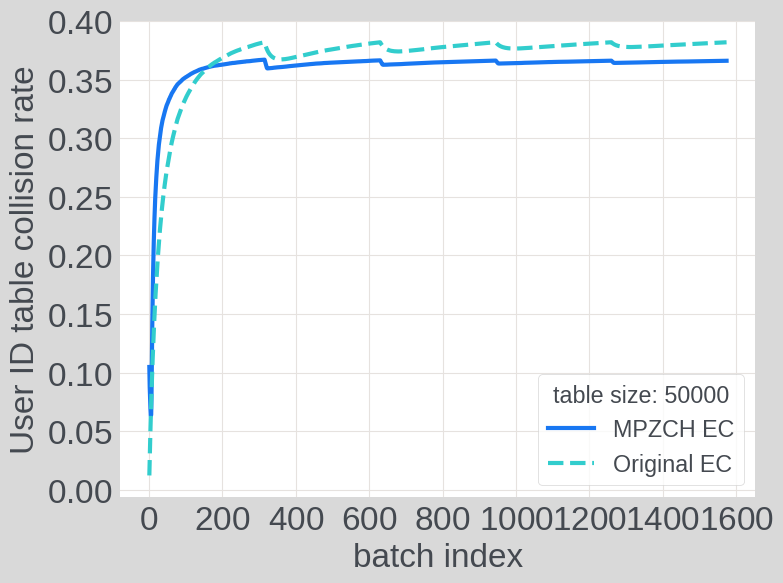

In [40]:
# plot the average ratio of accumulated_collision_count / accumulated_total_count for all the features
# the x-axis is the batch_idx, the y-axis is the ratio
for table_size in table_size_zch_method_avetage_collision_dict:
    fig = plt.figure(figsize=(8, 6))
    font_size = 24
    for zch_method_name in table_size_zch_method_avetage_collision_dict[table_size]:
        x_list = list(table_size_zch_method_avetage_collision_dict[table_size][zch_method_name].keys())
        y_list = list(table_size_zch_method_avetage_collision_dict[table_size][zch_method_name].values())
        line_style = "--" if "nonzch" in zch_method_name else "-"
        label_name = "Original EC" if "nonzch" in zch_method_name else "MPZCH EC"
        plt.plot(x_list, y_list, label=f"{label_name}", linewidth=3, linestyle=line_style)
        print(label_name)
    plt.xlabel("batch index", fontsize=font_size)
    plt.ylabel("User ID table collision rate", fontsize=font_size)
    # plt.title("average collision rate vs batch_idx", fontsize=font_size)
    plt.xticks(fontsize=font_size)
    plt.yticks(fontsize=font_size)
    plt.legend(fontsize=font_size*0.7, title=f"table size: {table_size}", title_fontsize=font_size*0.7)
    # save
    fig_path = os.path.join(figure_folder, f"video_id_table_collision_rate_vs_batch_idx_tbsize_{table_size}.png")
    plt.tight_layout()
    fig.savefig(fig_path)
    plt.show()
    plt.close()
# plot the ratio of accumulated_collision_count / accumulated_total_count